<a href="https://colab.research.google.com/github/JonathanJuradoS/EspacioEstados/blob/main/8puzzle_BFS_DFS_Visual_Arbol.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🧩 Resolución del Rompecabezas de 8 (8-Puzzle) con Búsqueda en Amplitud y Profundidad

## 🎯 Objetivo del Caso
Resolver el clásico rompecabezas de 8 fichas, encontrando una secuencia de movimientos desde el estado inicial (imagen) hasta el estado meta ordenado, usando grafos y algoritmos de búsqueda ciega: **BFS (amplitud)** y **DFS (profundidad)**.

## 📷 Estado Inicial del Puzzle (Imagen)
Representamos el estado inicial según la imagen proporcionada:
```
1 0 3
8 4 2
6 5 7
```
El espacio vacío está representado por 0.

In [2]:
from collections import deque

objetivo = [[1,2,3],[4,5,6],[7,8,0]]
movs = [(-1,0),(1,0),(0,-1),(0,1)]

def stringify(tab):
    return ''.join(str(x) for fila in tab for x in fila)

def encontrar(tab, val):
    for i in range(3):
        for j in range(3):
            if tab[i][j] == val:
                return i,j

def vecinos(tab):
    i,j = encontrar(tab, 0)
    estados = []
    for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        x,y = i+dx, j+dy
        if 0<=x<3 and 0<=y<3:
            nuevo = [fila[:] for fila in tab]
            nuevo[i][j], nuevo[x][y] = nuevo[x][y], nuevo[i][j]
            estados.append(nuevo)
    return estados


## 🧩 Explicación del Código

Este bloque define funciones auxiliares que son fundamentales para trabajar con el rompecabezas de 8 piezas (8-puzzle), utilizando una estructura basada en el **espacio de estados**.

---

### 🔹 Estado Objetivo

```python
objetivo = [[1,2,3],[4,5,6],[7,8,0]]
```

Representa la configuración final deseada del tablero. El número `0` es el espacio vacío.

---

### 🔹 Movimientos posibles

```python
movs = [(-1,0),(1,0),(0,-1),(0,1)]
```

Son los desplazamientos permitidos del `0`: arriba, abajo, izquierda y derecha.

---

### 🔹 Función `stringify(tab)`

```python
def stringify(tab):
    return ''.join(str(x) for fila in tab for x in fila)
```

Convierte el tablero (matriz 3x3) en una cadena de texto única. Esto permite compararlo o almacenarlo en estructuras como `set`.

📌 Ejemplo:

```python
[[1,2,3],[4,5,6],[7,8,0]] → "123456780"
```

---

### 🔹 Función `encontrar(tab, val)`

```python
def encontrar(tab, val):
    for i in range(3):
        for j in range(3):
            if tab[i][j] == val:
                return i,j
```

Busca la posición `(fila, columna)` de un valor dentro del tablero. Se usa principalmente para ubicar el `0`.

---

### 🔹 Función `vecinos(tab)`

```python
def vecinos(tab):
    i,j = encontrar(tab, 0)
    estados = []
    for dx,dy in [(-1,0),(1,0),(0,-1),(0,1)]:
        x,y = i+dx, j+dy
        if 0<=x<3 and 0<=y<3:
            nuevo = [fila[:] for fila in tab]
            nuevo[i][j], nuevo[x][y] = nuevo[x][y], nuevo[i][j]
            estados.append(nuevo)
    return estados
```

🔁 ¿Qué hace?

1. Encuentra la posición del `0`.
2. Genera nuevos estados válidos intercambiando el `0` con una celda adyacente.
3. Retorna todos los **vecinos** alcanzables en un solo movimiento.

---

Estas funciones sirven como base para aplicar algoritmos de búsqueda (como BFS o A*) en el problema del 8-puzzle.


In [3]:
def bfs(inicio):
    cola = deque([(inicio, [])])
    visitados = set()
    while cola:
        estado, camino = cola.popleft()
        clave = stringify(estado)
        if clave in visitados:
            continue
        visitados.add(clave)
        if estado == objetivo:
            return camino + [estado]
        for vecino in vecinos(estado):
            cola.append((vecino, camino + [estado]))

In [4]:
def dfs(inicio):
    pila = [(inicio, [])]
    visitados = set()
    while pila:
        estado, camino = pila.pop()
        clave = stringify(estado)
        if clave in visitados:
            continue
        visitados.add(clave)
        if estado == objetivo:
            return camino + [estado]
        for vecino in vecinos(estado):
            pila.append((vecino, camino + [estado]))

def dfs_limitado(inicio, prof_max=30):
    pila = [(inicio, [], 0)]
    visitados = set()

    while pila:
        estado, camino, profundidad = pila.pop()

        clave = stringify(estado)
        if clave in visitados:
            continue
        visitados.add(clave)

        if estado == objetivo:
            return camino + [estado]

        if profundidad >= prof_max:
            continue

        for vecino in vecinos(estado):
            pila.append((vecino, camino + [estado], profundidad + 1))

    return None

In [5]:
# Estado inicial desde la imagen
estado_img = [[1,0,3],[8,4,2],[6,5,7]]

# Ejecutar BFS y DFS
print("Ejecutando BFS...")
camino_bfs = bfs(estado_img)

print("Ejecutando DFS limitado...")
camino_dfs = dfs_limitado(estado_img, prof_max=25)

Ejecutando BFS...
Ejecutando DFS limitado...


In [6]:
# Mostrar comparación paso a paso
print("\n🧭 Comparación de pasos BFS vs DFS")
max_len = max(len(camino_bfs), len(camino_dfs))
for i in range(max_len):
    print(f"Paso {i}:")
    if i < len(camino_bfs):
        print("BFS:")
        for fila in camino_bfs[i]:
            print(fila)
    if i < len(camino_dfs):
        print("DFS:")
        for fila in camino_dfs[i]:
            print(fila)
    print("-")


🧭 Comparación de pasos BFS vs DFS
Paso 0:
BFS:
[1, 0, 3]
[8, 4, 2]
[6, 5, 7]
DFS:
[1, 0, 3]
[8, 4, 2]
[6, 5, 7]
-
Paso 1:
BFS:
[0, 1, 3]
[8, 4, 2]
[6, 5, 7]
DFS:
[1, 3, 0]
[8, 4, 2]
[6, 5, 7]
-
Paso 2:
BFS:
[8, 1, 3]
[0, 4, 2]
[6, 5, 7]
DFS:
[1, 3, 2]
[8, 4, 0]
[6, 5, 7]
-
Paso 3:
BFS:
[8, 1, 3]
[4, 0, 2]
[6, 5, 7]
DFS:
[1, 3, 2]
[8, 4, 7]
[6, 5, 0]
-
Paso 4:
BFS:
[8, 1, 3]
[4, 2, 0]
[6, 5, 7]
DFS:
[1, 3, 2]
[8, 4, 7]
[6, 0, 5]
-
Paso 5:
BFS:
[8, 1, 3]
[4, 2, 7]
[6, 5, 0]
DFS:
[1, 3, 2]
[8, 4, 7]
[0, 6, 5]
-
Paso 6:
BFS:
[8, 1, 3]
[4, 2, 7]
[6, 0, 5]
DFS:
[1, 3, 2]
[0, 4, 7]
[8, 6, 5]
-
Paso 7:
BFS:
[8, 1, 3]
[4, 2, 7]
[0, 6, 5]
DFS:
[1, 3, 2]
[4, 0, 7]
[8, 6, 5]
-
Paso 8:
BFS:
[8, 1, 3]
[0, 2, 7]
[4, 6, 5]
DFS:
[1, 3, 2]
[4, 7, 0]
[8, 6, 5]
-
Paso 9:
BFS:
[0, 1, 3]
[8, 2, 7]
[4, 6, 5]
DFS:
[1, 3, 0]
[4, 7, 2]
[8, 6, 5]
-
Paso 10:
BFS:
[1, 0, 3]
[8, 2, 7]
[4, 6, 5]
DFS:
[1, 0, 3]
[4, 7, 2]
[8, 6, 5]
-
Paso 11:
BFS:
[1, 2, 3]
[8, 0, 7]
[4, 6, 5]
DFS:
[0, 1, 3]
[4, 7, 2]
[8, 6, 5]
-
Pas

## 📊 Visualización gráfica de los caminos óptimos

BFS - Paso 21:


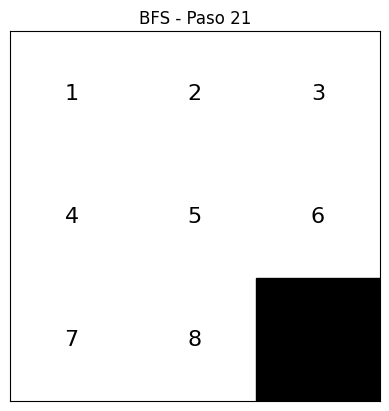

In [7]:
# 📊 Visualización del camino óptimo BFS
import matplotlib.pyplot as plt
import numpy as np
import time
from IPython.display import clear_output

def mostrar_tablero(estado, titulo):
    fig, ax = plt.subplots()
    ax.imshow(np.ones((3,3)), cmap="Greys")
    for i in range(3):
        for j in range(3):
            val = estado[i][j]
            if val != 0:
                ax.text(j, i, str(val), ha='center', va='center', fontsize=16)
            else:
                ax.add_patch(plt.Rectangle((j - 0.5, i - 0.5), 1, 1, color='black'))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(titulo)
    plt.show()

for paso, estado in enumerate(camino_bfs):
    clear_output(wait=True)
    print(f"BFS - Paso {paso}:")
    mostrar_tablero(estado, f"BFS - Paso {paso}")
    time.sleep(1)

DFS - Paso 23:


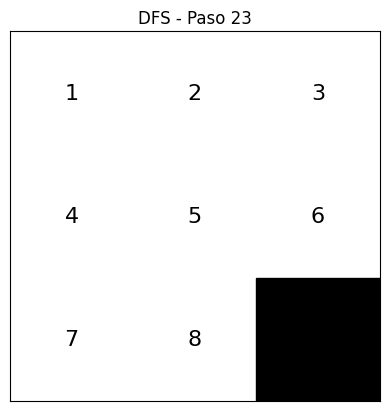

In [8]:
# 📊 Visualización del camino óptimo DFS
for paso, estado in enumerate(camino_dfs):
    clear_output(wait=True)
    print(f"DFS - Paso {paso}:")
    mostrar_tablero(estado, f"DFS - Paso {paso}")
    time.sleep(1)

## 🌳 Árboles de búsqueda generados por BFS y DFS

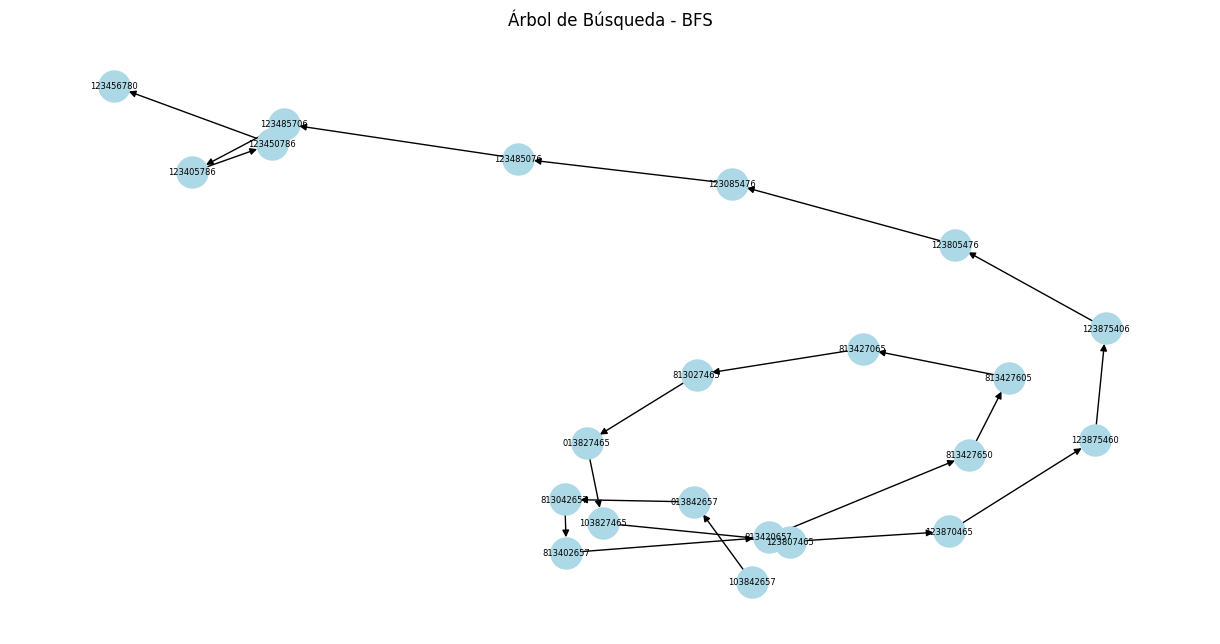

In [ ]:
# 🌳 Árbol de búsqueda BFS como grafo
import networkx as nx

G_bfs = nx.DiGraph()
for i in range(len(camino_bfs)-1):
    G_bfs.add_edge(stringify(camino_bfs[i]), stringify(camino_bfs[i+1]))

plt.figure(figsize=(12,6))
pos = nx.spring_layout(G_bfs, seed=1)
nx.draw(G_bfs, pos, with_labels=True, node_size=500, node_color='lightblue', font_size=6)
plt.title("Árbol de Búsqueda - BFS")
plt.show()

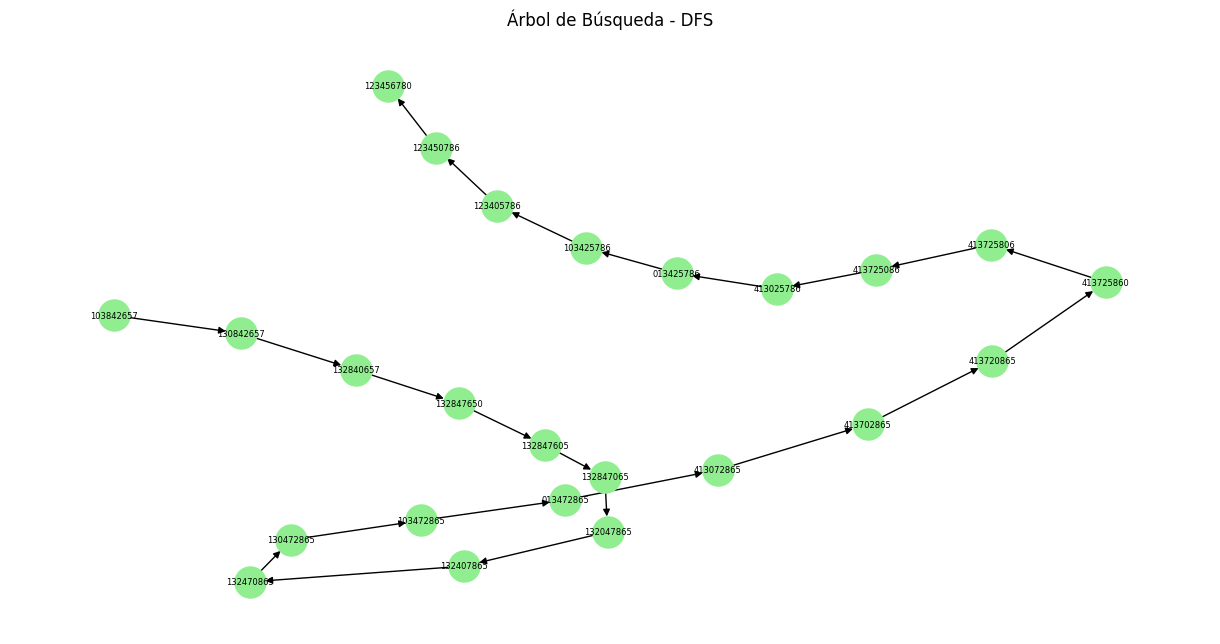

In [ ]:
# 🌳 Árbol de búsqueda DFS como grafo
G_dfs = nx.DiGraph()
for i in range(len(camino_dfs)-1):
    G_dfs.add_edge(stringify(camino_dfs[i]), stringify(camino_dfs[i+1]))

plt.figure(figsize=(12,6))
pos = nx.spring_layout(G_dfs, seed=2)
nx.draw(G_dfs, pos, with_labels=True, node_size=500, node_color='lightgreen', font_size=6)
plt.title("Árbol de Búsqueda - DFS")
plt.show()